In [1]:
import numpy as np
import os
import pandas as pd

from app.glip import GLIP
from app.visualization import plot_multiple_images, read_image, plot_bboxes

/opt/conda/envs/glip/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /home/ivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ivan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data_dir = "/home/ivan/data/imagenet_samples/"
csv_name = "0010_samples.csv"

In [3]:
df_samples = pd.read_csv(os.path.join(data_dir, csv_name))
df_samples.head(2)

,image_path,class_name
0,images/n03447447_10247.JPEG,gondola
1,images/n03954731_19743.JPEG,plane


In [4]:
# for convenience, I will load all images in memory and store them in a new column
df_samples["image_path"] = df_samples["image_path"].apply(lambda x: os.path.join(data_dir, x))
df_samples["image"] = df_samples["image_path"].apply(read_image)

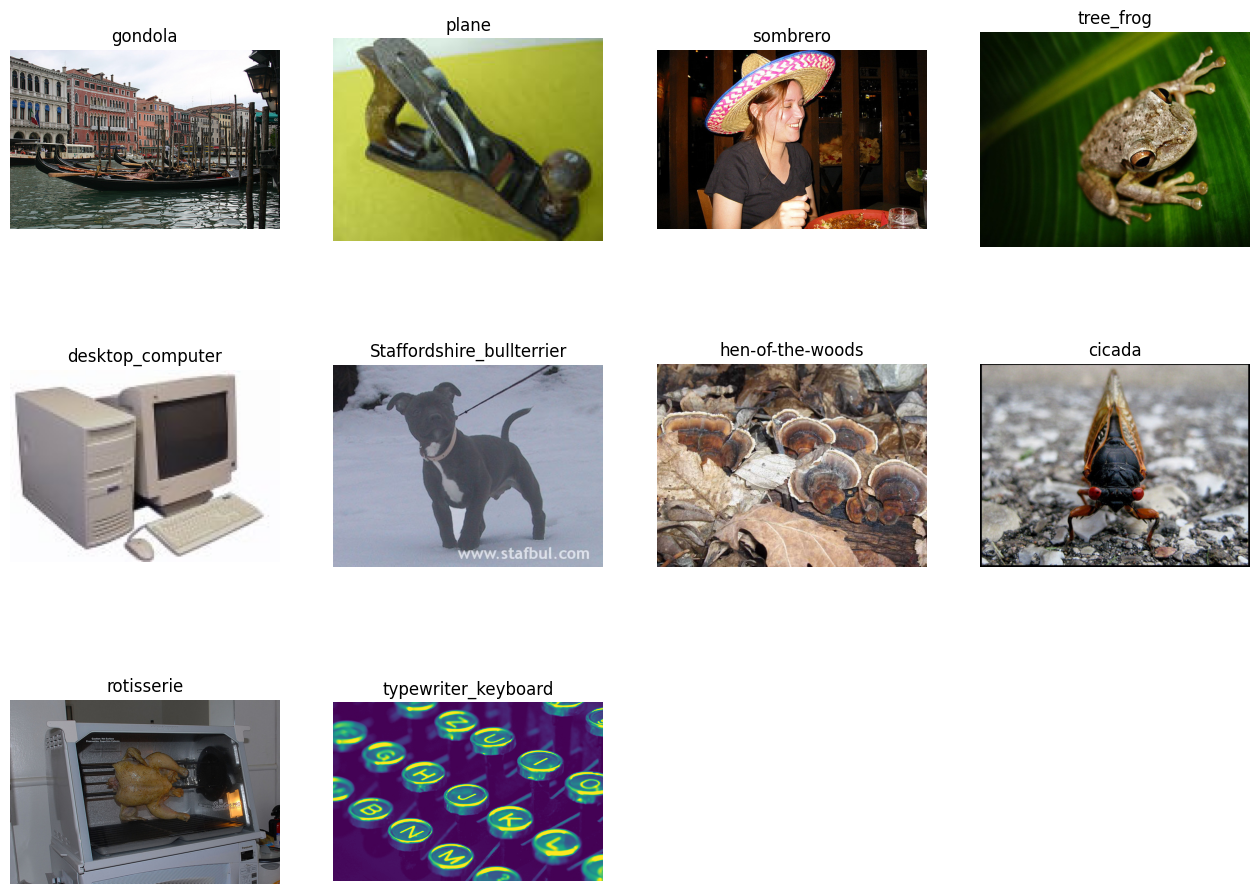

In [5]:
plot_multiple_images(images=df_samples["image"].values, titles=df_samples["class_name"].values)

In [6]:
glip = GLIP()
images = df_samples["image"].values

Check GPU info:
CUDA available: True
CUDA version: 11.1
GPU count: 1
GPU name: Tesla P100-PCIE-16GB
GPU memory: 17071800320
Initializing GLIP Model...
VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['bert.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'bert.pooler.dense.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
Time: 12.700305461883545


image.shape: (333, 500, 3)
[[[10, 17]]]


/opt/conda/envs/glip/lib/python3.7/site-packages/transformers/modeling_utils.py:811: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning
/opt/conda/envs/glip/lib/python3.7/site-packages/torch/nn/functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


inference time per image: 0.5310926920001293
image.shape: (120, 160, 3)
[[[10, 17]]]
inference time per image: 0.38762358400072117
image.shape: (333, 500, 3)
[[[10, 17]]]
inference time per image: 0.42582282799958193
image.shape: (400, 500, 3)
[[[10, 17]]]
inference time per image: 0.36463159100003395
image.shape: (107, 150, 3)
[[[10, 17]]]
inference time per image: 0.40659038400008285
image.shape: (374, 500, 3)
[[[10, 17]]]
inference time per image: 0.3867946549999033
image.shape: (600, 797, 3)
[[[10, 17]]]
inference time per image: 0.38674791199991887
image.shape: (377, 500, 3)
[[[10, 17]]]
inference time per image: 0.3846706639997137
image.shape: (342, 500, 3)
[[[10, 17]]]
inference time per image: 0.4163864920001288
image.shape: (531, 800)
[[[10, 17]]]
inference time per image: 0.42649585399976786


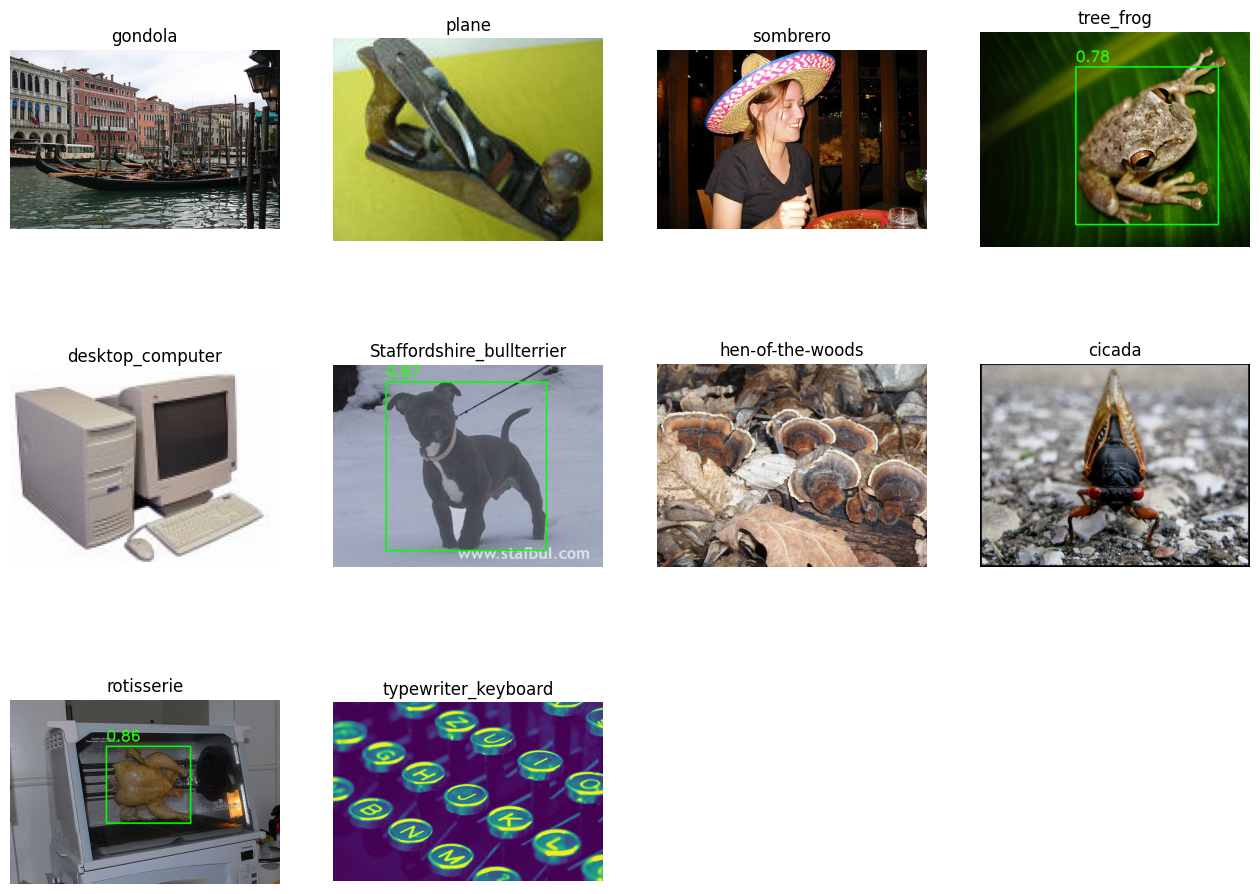

In [7]:
query = "a roasted chicken"
outputs = []
for image in images:
    image = np.array(image)
    predictions = glip.predict(image, query, debug=False)
    image = plot_bboxes(image, *predictions)
    outputs.append(image)
plot_multiple_images(images=outputs, titles=df_samples["class_name"].values)

image.shape: (333, 500, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.4475347999996302
image.shape: (120, 160, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.39061199899970234
image.shape: (333, 500, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.42944649400033086
image.shape: (400, 500, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.3684176450005907
image.shape: (107, 150, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.40763943799993285
image.shape: (374, 500, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.3883515580000676
image.shape: (600, 797, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.38886165900021297
image.shape: (377, 500, 3)
[[[0, 1]], [[20, 21]], [[7, 12]], [[24, 28]]]
inference time per image: 0.3903755849996742
image.shape: (342, 500, 3)
[[[0, 1]], [[20, 21]], [[

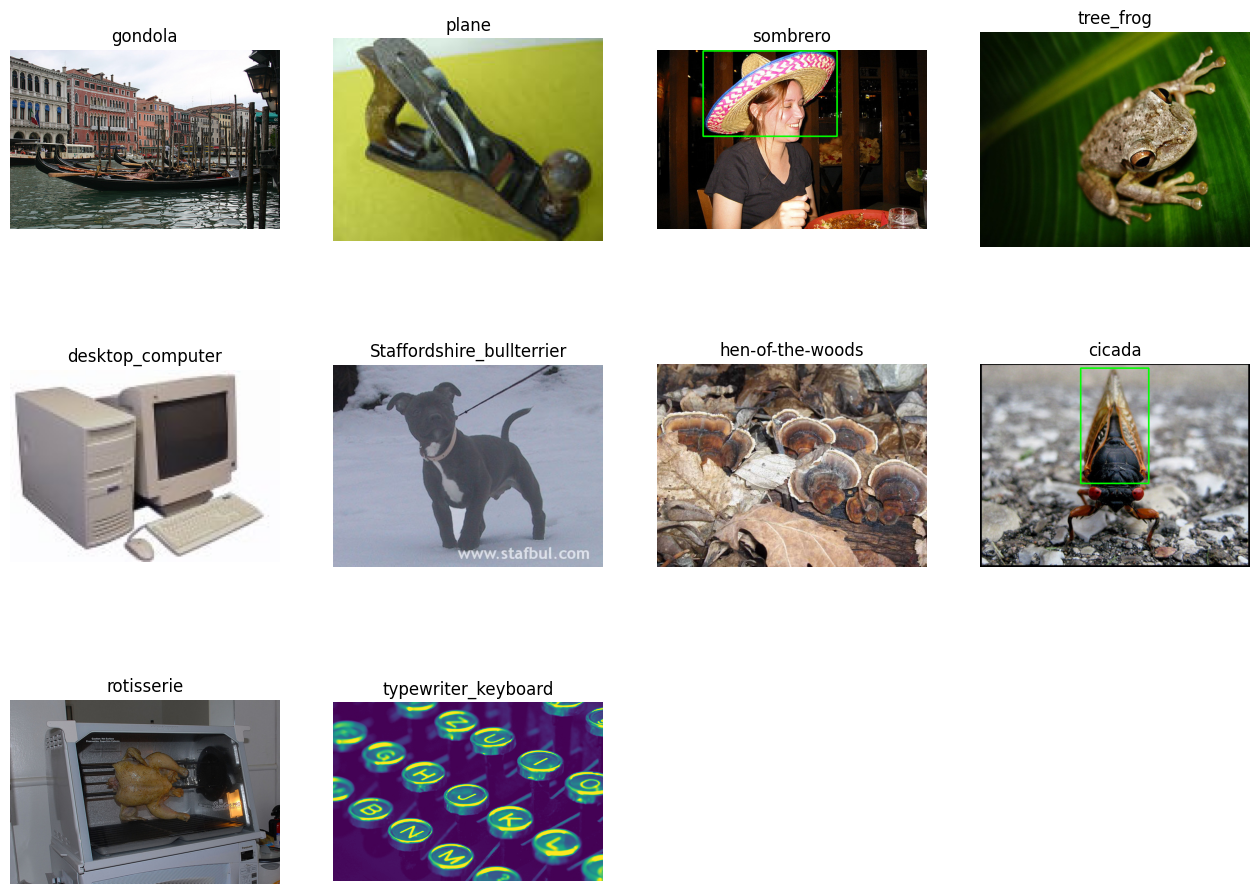

In [9]:
query = "I wear a hat and eating food"
images = df_samples["image"].values
outputs = []
for image in images:
    image = np.array(image)
    predictions = glip.predict(image, query, debug=False)
    image = plot_bboxes(image, *predictions)
    outputs.append(image)
plot_multiple_images(images=outputs, titles=df_samples["class_name"].values)